In [3]:
import os
import numpy as np
import pandas as pd
import pypsa
import matplotlib.pyplot as plt

## Load Networks

In [4]:
network = pypsa.Network("networks/sample/solved/2019_181_90m_c1.25_Co2L0.0-1H.nc")

INFO:pypsa.io:Imported network 2019_181_90m_c1.25_Co2L0.0-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


## Plot Network Overview

/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


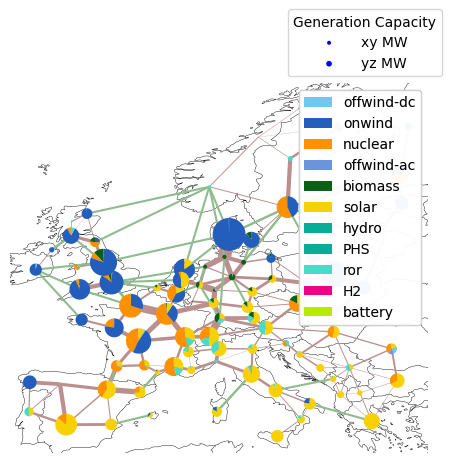

In [38]:
tech_colors = {
    'solar': 'yellow',
    'onwind': 'blue',
    'offwind-ac': 'cyan',
    'offwind-dc': 'teal',
    'biomass': 'green',
    'nuclear': 'purple',
    'hydro': 'lightblue',
    'PHS': 'darkblue',
    'ror': 'royalblue',
    'H2': 'pink',
    'battery': 'orange',
}

tech_color = list(tech_colors.values())
tech_label = list(tech_colors.keys())

# Calculate total generation grouped by ['bus', 'carrier'] in one line
total_generation_by_bus_and_carrier = (
    network.generators_t.p.sum(axis=0)
    .groupby([network.generators["bus"], network.generators["carrier"]])
    .sum()
)

# Use total generation instead of capacity for bus_sizes
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

network.plot(
    ax=ax,
    line_widths=network.lines.s_nom_opt / 5000.0,
    bus_sizes=total_generation_by_bus_and_carrier / 100000000.0,  # Use generation instead of capacity
    bus_colors= network.carriers.color,
)

# Define sizes and labels for the legend
sizes = [0.033, 0.066]  # Example sizes for the legend
labels = ["xy MW", "yz MW"]  # Example labels for the legend
legend_kw = {
    "loc": "lower right",  # Relative position inside the legend box
    "bbox_to_anchor": (1.05, 1),  # Coordinates of the legend box's corner relative to the axes
    "title": "Generation Capacity",
}
pypsa.plot.add_legend_circles(
    ax, sizes, labels, srid=4326, patch_kw=dict(facecolor="blue"), legend_kw=legend_kw
)
pypsa.plot.add_legend_patches(ax, colors=network.carriers['color'], labels=network.carriers.index, patch_kw={}, legend_kw={})

# print("Bus Colors:", network.carriers.color)
# print("Legend Colors:", list(tech_colors.values()))

/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


61820.89555627521

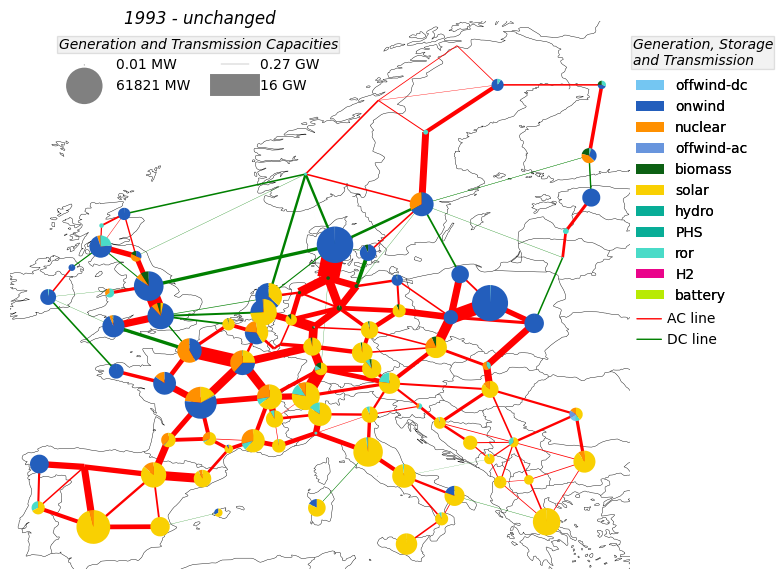

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(8, 8))
network.plot(ax=ax,
    line_widths=network.lines.s_nom_opt/3000., line_colors='red',
    link_widths=network.links.p_nom_opt/3000., link_colors='green',
    bus_sizes=network.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()/50000., bus_colors=network.carriers.color,
)
# Define sizes and labels for the legend
sizes = [network.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().min()/10, network.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().max()/50000]  # These could represent capacity in MW, for example
transmission_sizes = [network.lines.s_nom_opt.min()/3000., network.lines.s_nom_opt.max()/3000.]
transmission_labels = [f'{network.lines.s_nom_opt.min()/3000:.2f} GW', f'{network.lines.s_nom_opt.max()/3000:.0f} GW']
labels = [f'{network.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().min():.2f} MW', f'{network.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().max():.0f} MW']
pypsa.plot.add_legend_circles(ax, sizes, labels, srid=4326, patch_kw=dict(facecolor='grey'), legend_kw={
    'loc': 'center',  # Relative position inside the legend box
    'bbox_to_anchor': (0.2, 0.9),  # Coordinates of the legend box's corner relative to the axes
    #'title': 'Generation and Transmission Capacity',
    'frameon': False
})
pypsa.plot.add_legend_lines(ax, transmission_sizes, transmission_labels, patch_kw=dict(color='grey'), legend_kw={
    'loc': 'center',  # Relative position inside the legend box
    'bbox_to_anchor': (0.42, 0.9),  # Coordinates of the legend box's corner relative to the axes
    #'title': 'Transmission Capacity',
    'frameon': False
})
pypsa.plot.add_legend_patches(ax, colors=network.carriers['color'], labels=network.carriers.index, patch_kw={}, legend_kw={
    'loc': 'center',  # Relative position inside the legend box
    'bbox_to_anchor': (1.1, 0.69),  # Coordinates of the legend box's corner relative to the axes
    #'title': 'Transmission Capacity',
    'frameon': False,
    'ncol': 1
})
ax.text(
    -3, 69.5,  # Example longitude, latitude
    f'1993 - unchanged', 
    style='oblique',
    fontsize=12,
    #bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 1},
    transform=ccrs.PlateCarree()  # Ensure text is plotted in geographic coordinates
)
ax.text(
    -7, 68,  # Example longitude, latitude
    'Generation and Transmission Capacities', 
    style='italic',
    bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 1},
    transform=ccrs.PlateCarree()  # Ensure text is plotted in geographic coordinates
)
ax.text(
    28, 67,  # Example longitude, latitude
    'Generation, Storage\nand Transmission', 
    style='italic',
    bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 1},
    transform=ccrs.PlateCarree()  # Ensure text is plotted in geographic coordinates
)
ax.annotate('AC line', xy=(28.1, 51.5), xytext=(30.1, 51.25), fontsize=10,
            arrowprops=dict(color='red', arrowstyle='-'),
    transform=ccrs.PlateCarree())
ax.annotate('DC line', xy=(28.1, 50.25), xytext=(30.1, 50), fontsize=10,
            arrowprops=dict(color='green', arrowstyle='-'),
    transform=ccrs.PlateCarree())

In [8]:
network.generators.groupby(['carrier']).p_nom_opt.sum()

network.generators_t.p.sum(axis=0).groupby(network.generators["carrier"]).sum()
network.lines['s_nom'] *= 10
network.lines['s_nom']

Line
1      1.698103e+06
2      2.189659e+06
3      0.000000e+00
4      2.189659e+06
5      6.792410e+06
           ...     
140    1.143985e+07
141    3.396205e+06
142    5.094308e+06
143    8.982069e+06
144    1.505949e+07
Name: s_nom, Length: 144, dtype: float64

In [31]:
#bus_sizes = n.loads_t.p_set.sum(axis=0)*1e-8 
#line_widths = n.lines['s_nom']*2e-4 
#link_widths = n.links['p_nom']*2e-3
#n.plot(bus_sizes=bus_sizes, line_widths=line_widths, link_widths=link_widths)
network.lines_t.mu_upper

Line,1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,-0.000449,-0.000000,-0.001006,-0.000000,-0.000004,-0.0,-0.000001,-0.000004,-0.000000,-0.000126,...,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-13.946584,-0.000000,-0.000000,-0.000008
2019-07-01 01:00:00,-0.000390,-0.000000,-0.001220,-0.000000,-0.000003,-0.0,-0.000000,-0.000005,-0.000000,-0.000401,...,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-13.927977,-0.000000,-0.000000,-0.000008
2019-07-01 02:00:00,-0.000217,-0.000000,-0.003094,-0.000000,-0.000002,-0.0,-0.000000,-0.000002,-0.000000,-0.000443,...,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-13.942414,-0.000000,-0.000000,-0.000008
2019-07-01 03:00:00,-0.000021,-0.000000,-0.000297,-0.000003,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000371,...,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-4.869162,-0.000000,-0.000000,-0.000006
2019-07-01 04:00:00,-0.000000,-0.000000,-0.000010,-0.000000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.001492,...,-0.0,-0.0,-0.000000,-0.0,-0.000009,-0.0,-0.000123,-0.000000,-0.000004,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 19:00:00,-0.000055,-0.000000,-0.000587,-0.000012,-0.000000,-0.0,-0.000000,-0.000000,-0.000019,-0.000033,...,-0.0,-0.0,-0.000005,-0.0,-0.000107,-0.0,-0.000026,-0.000000,-0.000003,-0.000005
2020-06-30 20:00:00,-0.000000,-0.000009,-0.000013,-0.000007,-0.000000,-0.0,-0.000000,-0.000000,-0.000010,-0.000112,...,-0.0,-0.0,-0.000005,-0.0,-0.000089,-0.0,-0.000035,-0.000000,-0.000003,-0.000005
2020-06-30 21:00:00,-0.000032,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.020522,...,-0.0,-0.0,-0.000002,-0.0,-0.000032,-0.0,-0.000047,-0.000008,-0.000004,-0.000004


Index(['AL0 0', 'AT0 0', 'BA0 0', 'BE0 0', 'BE0 1', 'BG0 0', 'CH0 0', 'CZ0 0',
       'DE0 0', 'DE0 1',
       ...
       'PT1', 'RO0', 'RO1', 'RS1', 'SE1', 'SE2', 'SI0', 'SI1', 'SK0', 'SK1'],
      dtype='object', length=146)
Index(['AL0 0', 'AT0 0', 'BA0 0', 'BE0 0', 'BE0 1', 'BG0 0', 'CH0 0', 'CZ0 0',
       'DE0 0', 'DE0 1', 'DE0 10', 'DE0 11', 'DE0 12', 'DE0 13', 'DE0 2',
       'DE0 3', 'DE0 4', 'DE0 5', 'DE0 6', 'DE0 7', 'DE0 8', 'DE0 9', 'DK0 0',
       'DK1 0', 'EE2 0', 'ES0 0', 'ES0 1', 'ES0 2', 'ES0 3', 'ES0 4', 'ES0 5',
       'ES3 0', 'FI1 0', 'FI1 1', 'FR0 0', 'FR0 1', 'FR0 10', 'FR0 11',
       'FR0 2', 'FR0 3', 'FR0 4', 'FR0 5', 'FR0 6', 'FR0 7', 'FR0 8', 'FR0 9',
       'GB4 0', 'GB4 1', 'GB4 2', 'GB4 3', 'GB4 4', 'GB4 5', 'GB4 6', 'GB4 7',
       'GB5 0', 'GR0 0', 'HR0 0', 'HU0 0', 'IE5 0', 'IT0 0', 'IT0 1', 'IT0 2',
       'IT0 3', 'IT0 4', 'IT0 5', 'IT0 6', 'IT0 7', 'IT6 0', 'LT2 0', 'LU0 0',
       'LV2 0', 'ME0 0', 'MK0 0', 'NL0 0', 'NL0 1', 'NO1 0', 'NO1 1', 'NO1

ValueError: Invalid RGBA argument: nan

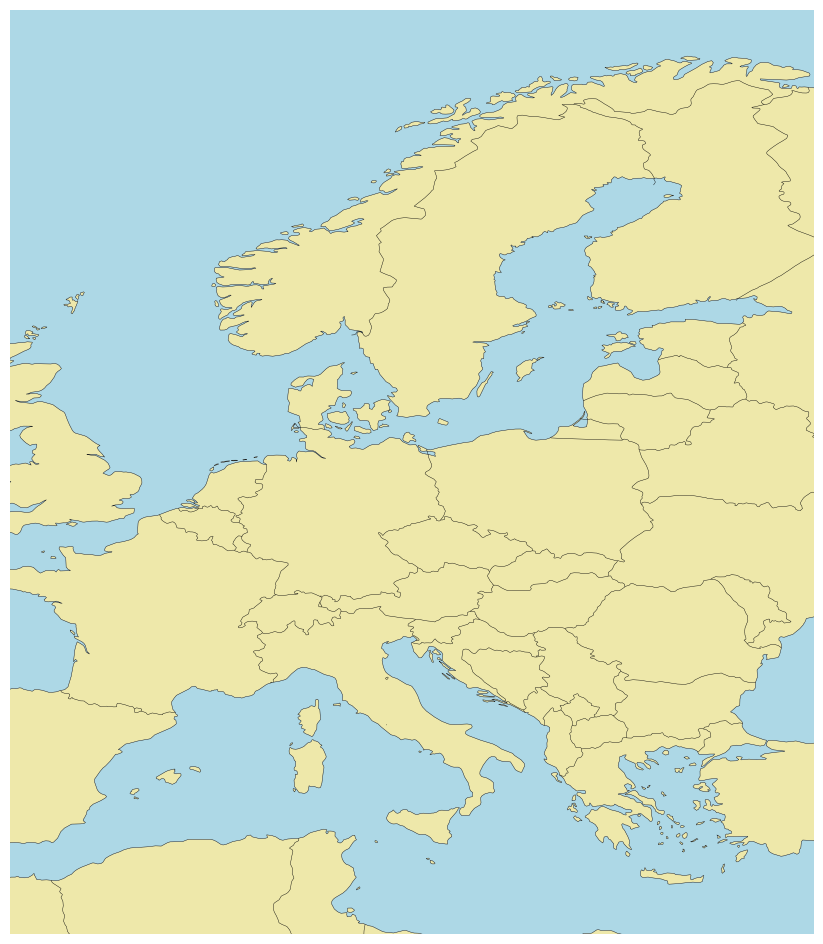

In [3]:
from scripts.Plotting import plot_map
from scripts.Plotting import pie_chart_generation
import warnings
warnings.filterwarnings("ignore")
tech_colors = {'onshore wind':'blue',
              'solar PV':'orange',
              'biomass':'red',
              'hydroelectricity':'grey',
              'nuclear':'green',
              'offwind-ac':'black',
              'offwind-dc':'purple',
              'onwind':'lightgreen'}
plot_map(n, tech_colors, threshold=10,components=["generators"], 
             bus_size_factor=5e5, transmission=True)

Warning! solar PV not defined in tech_colors
dropping non-buses Index(['AL1', 'AT1', 'BA1', 'BE0', 'BE1', 'BG0', 'BG1', 'CH0', 'CH1', 'CZ0',
       'CZ1', 'DE0', 'DE1', 'DK0', 'DK1', 'DK2', 'EE12', 'ES0', 'ES1', 'ES4',
       'FI1', 'FI2', 'FR0', 'FR1', 'GB0', 'GB11', 'GB4', 'GB5', 'GR1', 'HR1',
       'HU0', 'HU1', 'IE11', 'IT0', 'IT1', 'IT3', 'LT12', 'LU0', 'LU1', 'LV12',
       'ME1', 'MK1', 'NL0', 'NL1', 'NO2', 'PL1', 'PT1', 'RO0', 'RO1', 'RS1',
       'SE1', 'SE2', 'SI0', 'SI1', 'SK0', 'SK1'],
      dtype='object')


ValueError: Colors not defined for all elements in the second MultiIndex 

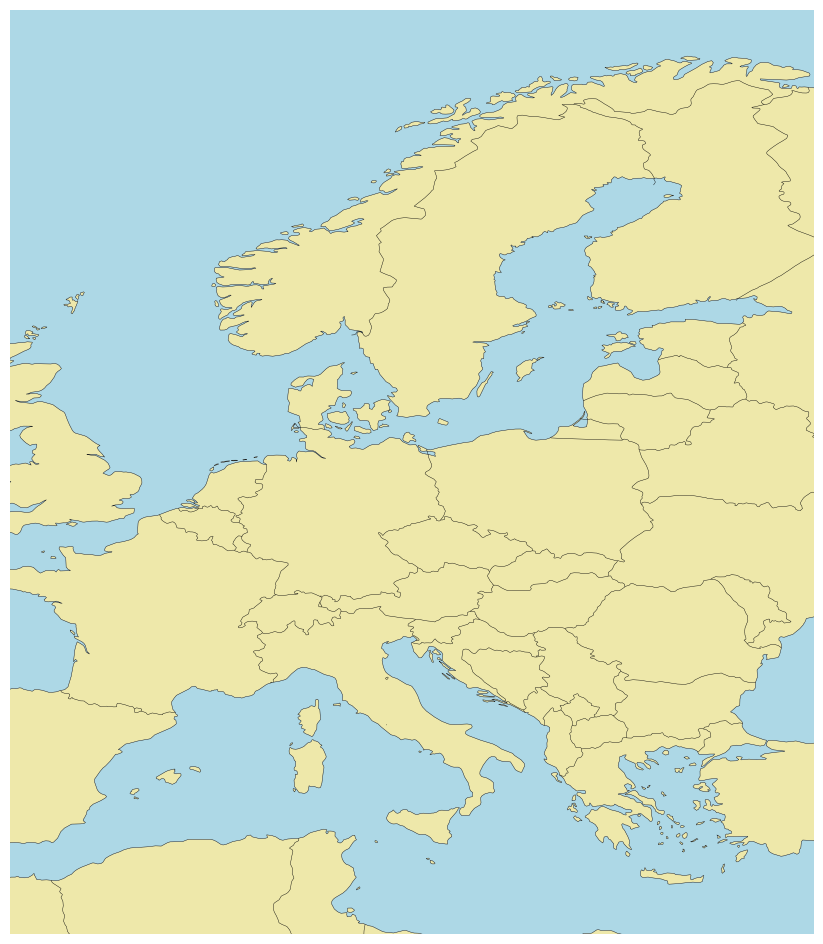

In [39]:
from scripts.map_plotting import plot_map
import warnings
warnings.filterwarnings("ignore")
tech_colors = {
    'solar': 'yellow',
    'onwind': 'blue',
    'offwind-ac': 'cyan',
    'offwind-dc': 'teal',
    'biomass': 'green',
    'nuclear': 'purple',
    'hydro': 'lightblue',
    'PHS': 'darkblue',
    'ror': 'royalblue',
    'H2': 'pink',
    'battery': 'orange',
}
#         "solar": "Solar PV",
#         "onwind": "Onshore Wind",
#         "offwind-ac": "Offshore Wind (AC)",
#         "offwind-dc": "Offshore Wind (DC)",
#         "biomass": "Biomass",
#         "nuclear": "Nuclear",
#         "hydro": "Hydroelectricity",
#         "PHS": "Pumped Hydro Storage",
#         "ror": "Run-of-River Hydro",
#         "H2": "Hydrogen",
#         "battery": "Battery Storage",
# 'biomass' 'nuclear' 'offwind-ac' 'onwind' 'ror' 'solar' 'offwind-dc'
# Plotting map
plot_map(n ,tech_colors, threshold=10, components=["generators"], bus_size_factor=5e5, transmission=True)

In [41]:
print(n.generators.carrier.unique())
n.generators.carrier
print(n.generators_t.p.columns)

['biomass' 'nuclear' 'offwind-ac' 'onwind' 'ror' 'solar' 'offwind-dc']
Index(['BE0 0 biomass', 'BE0 0 nuclear', 'BE0 1 biomass', 'BG0 0 nuclear',
       'CH0 0 biomass', 'CH0 0 nuclear', 'CZ0 0 biomass', 'CZ0 0 nuclear',
       'DE0 0 biomass', 'DE0 1 biomass',
       ...
       'SE2 6 onwind', 'SE2 6 ror', 'SE2 6 solar', 'SI1 0 offwind-ac',
       'SI1 0 onwind', 'SI1 0 ror', 'SI1 0 solar', 'SK1 0 onwind', 'SK1 0 ror',
       'SK1 0 solar'],
      dtype='object', name='Generator', length=692)


In [49]:
print(n.buses.head())

       v_nom type          x          y carrier unit  v_mag_pu_set  \
Bus                                                                  
AL0 0  380.0       19.927367  41.531444      AC                1.0   
AT0 0  380.0       13.174287  47.569450      AC                1.0   
BA0 0  380.0       18.101135  43.938903      AC                1.0   
BE0 0  380.0        5.066985  50.655320      AC                1.0   
BE0 1  380.0        3.359803  51.163557      AC                1.0   

       v_mag_pu_min  v_mag_pu_max control         generator sub_network  \
Bus                                                                       
AL0 0           0.0           inf   Slack  AL1 0 offwind-ac               
AT0 0           0.0           inf      PQ                                 
BA0 0           0.0           inf      PQ                                 
BE0 0           0.0           inf      PQ                                 
BE0 1           0.0           inf      PQ                  

/tmp/ipykernel_19438/1096232865.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  n.generators_t.p.groupby(n.generators.bus, axis=1).sum()
/tmp/ipykernel_19438/1096232865.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.carrier, axis=1).sum()


ValueError: The passed axis is not a GeoAxesSubplot. You can 

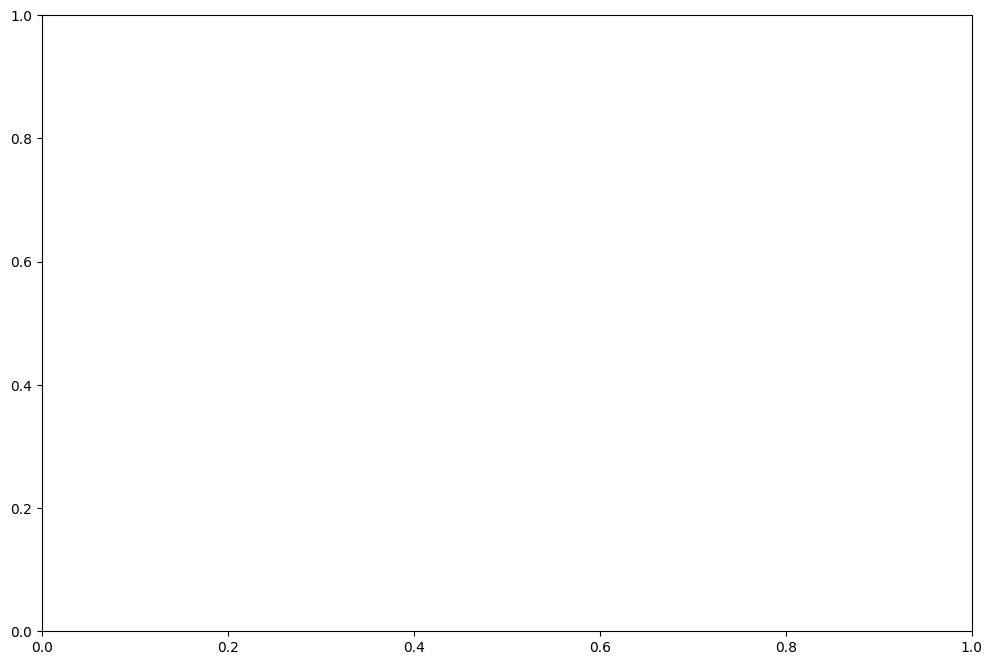

In [5]:
# Calculate the energy mix for each bus
energy_mix = (
    n.generators_t.p.groupby(n.generators.bus, axis=1).sum()
    .groupby(n.generators.carrier, axis=1).sum()
)

# Sum over all timesteps to get total energy produced per carrier at each bus
total_energy_mix = energy_mix.sum(axis=0)

# Normalize to ensure pie chart sizes match bus sizes
normalized_energy_mix = energy_mix.div(energy_mix.sum(axis=1), axis=0).fillna(0)


import matplotlib.pyplot as plt

def plot_pie_charts(ax, bus_sizes, bus_locations, normalized_mix, tech_colors):
    """
    Adds pie charts to the plot at bus locations.

    Parameters:
    - ax: Matplotlib Axes object
    - bus_sizes: Series with bus sizes
    - bus_locations: DataFrame with 'x' and 'y' positions of buses
    - normalized_mix: DataFrame with energy mix values normalized by carrier
    - tech_colors: Dictionary mapping carriers to colors
    """
    for bus, size in bus_sizes.items():
        if bus in bus_locations.index:
            x, y = bus_locations.loc[bus, ['x', 'y']]
            mix = normalized_mix.loc[bus]
            sizes = mix.values  # Carrier proportions for the pie chart
            colors = [tech_colors[carrier] for carrier in mix.index if carrier in tech_colors]

            # Draw the pie chart
            ax.pie(
                sizes, 
                colors=colors, 
                center=(x, y), 
                radius=size**0.5, 
                wedgeprops={'linewidth': 0}
            )

# Compute bus locations
bus_locations = n.buses[['x', 'y']]

# Define tech colors for energy mix carriers
tech_colors = {
    'solar': 'yellow',
    'onwind': 'blue',
    'biomass': 'green',
    'offwind-ac': 'cyan',
    'offwind-dc': 'teal',
    'nuclear': 'red',
    'hydro': 'darkblue',
    'PHS': 'purple',
    'ror': 'lightblue',
    'H2': 'orange',
    'battery': 'gray'
}

bus_sizes = n.loads_t.p_set.sum(axis=0)*1e-8 
line_widths = n.lines['s_nom']*2e-4 
link_widths = n.links['p_nom']*2e-3

# Plot the base map
fig, ax = plt.subplots(figsize=(12, 8))
n.plot(ax=ax, bus_sizes=bus_sizes, line_widths=line_widths, link_widths=link_widths)

# Overlay pie charts
plot_pie_charts(ax, bus_sizes, bus_locations, normalized_energy_mix, tech_colors)

plt.show()


Empty DataFrame
Columns: [1993-07-01 00:00:00, 1993-07-01 01:00:00, 1993-07-01 02:00:00, 1993-07-01 03:00:00, 1993-07-01 04:00:00, 1993-07-01 05:00:00, 1993-07-01 06:00:00, 1993-07-01 07:00:00, 1993-07-01 08:00:00, 1993-07-01 09:00:00, 1993-07-01 10:00:00, 1993-07-01 11:00:00, 1993-07-01 12:00:00, 1993-07-01 13:00:00, 1993-07-01 14:00:00, 1993-07-01 15:00:00, 1993-07-01 16:00:00, 1993-07-01 17:00:00, 1993-07-01 18:00:00, 1993-07-01 19:00:00, 1993-07-01 20:00:00, 1993-07-01 21:00:00, 1993-07-01 22:00:00, 1993-07-01 23:00:00, 1993-07-02 00:00:00, 1993-07-02 01:00:00, 1993-07-02 02:00:00, 1993-07-02 03:00:00, 1993-07-02 04:00:00, 1993-07-02 05:00:00, 1993-07-02 06:00:00, 1993-07-02 07:00:00, 1993-07-02 08:00:00, 1993-07-02 09:00:00, 1993-07-02 10:00:00, 1993-07-02 11:00:00, 1993-07-02 12:00:00, 1993-07-02 13:00:00, 1993-07-02 14:00:00, 1993-07-02 15:00:00, 1993-07-02 16:00:00, 1993-07-02 17:00:00, 1993-07-02 18:00:00, 1993-07-02 19:00:00, 1993-07-02 20:00:00, 1993-07-02 21:00:00, 1993-07-

/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipykernel_19438/3680817063.py:22: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  .groupby(n.generators.carrier, axis=0).sum()


KeyError: 'AL0 0'

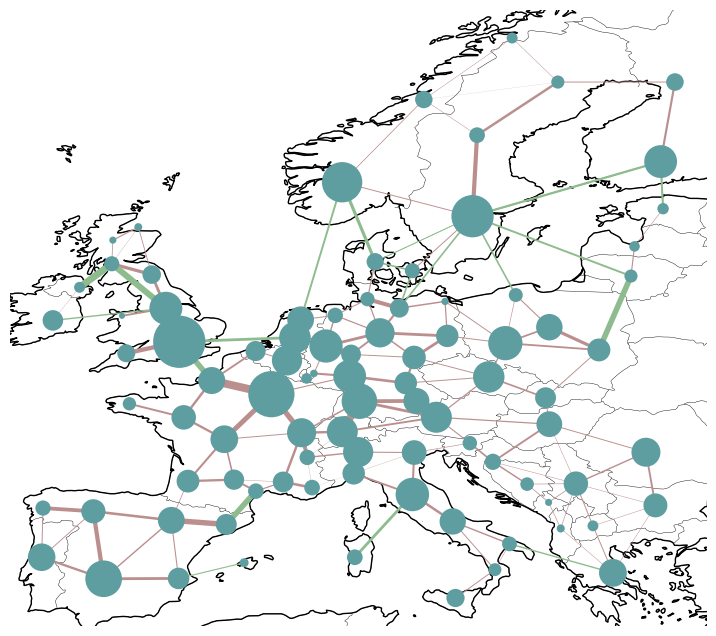

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a geographic plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the base map
n.plot(
    ax=ax,
    bus_sizes=bus_sizes,
    line_widths=line_widths,
    link_widths=link_widths,
    geomap=True
)

# Add coastlines for better context
ax.coastlines()

# Energy mix calculation (updated syntax)
energy_mix = (
    n.generators_t.p.T.groupby(n.generators.bus).sum()
    .groupby(n.generators.carrier, axis=0).sum()
)


# Normalize for pie chart plotting
total_energy_mix = energy_mix.sum(axis=0)
normalized_energy_mix = energy_mix.div(energy_mix.sum(axis=1), axis=0).fillna(0)

print(energy_mix)

# Bus locations
bus_locations = n.buses[['x', 'y']]

# Define tech colors
tech_colors = {
    'solar': 'yellow',
    'onwind': 'blue',
    'biomass': 'green',
    'offwind-ac': 'cyan',
    'offwind-dc': 'teal',
    'nuclear': 'red',
    'hydro': 'darkblue',
    'PHS': 'purple',
    'ror': 'lightblue',
    'H2': 'orange',
    'battery': 'gray'
}

# Pie chart overlay function
def plot_pie_charts(ax, bus_sizes, bus_locations, normalized_mix, tech_colors):
    for bus, size in bus_sizes.items():
        if bus in bus_locations.index:
            x, y = bus_locations.loc[bus, ['x', 'y']]
            mix = normalized_mix.loc[bus]
            sizes = mix.values
            colors = [tech_colors[carrier] for carrier in mix.index if carrier in tech_colors]
            ax.pie(sizes, colors=colors, center=(x, y), radius=size**0.5, wedgeprops={'linewidth': 0})

# Add pie charts
plot_pie_charts(ax, bus_sizes, bus_locations, normalized_energy_mix, tech_colors)

# Show plot
plt.show()


In [10]:
n.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
BE0 0 biomass,BE0 0,,,95.0000,0.0,False,95.0000,inf,0.0,1.00,...,0,0,1,0,NaN,NaN,1.0,1.0,0.000000,95.000000
BE0 0 nuclear,BE0 0,,,5919.0000,0.0,False,5919.0000,inf,0.0,0.65,...,0,0,1,0,NaN,NaN,1.0,1.0,0.000000,5919.000000
BE0 1 biomass,BE0 1,,,268.0000,0.0,False,268.0000,inf,0.0,1.00,...,0,0,1,0,NaN,NaN,1.0,1.0,0.000000,268.000000
BG0 0 nuclear,BG0 0,,,2080.0000,0.0,False,2080.0000,inf,0.0,0.89,...,0,0,1,0,NaN,NaN,1.0,1.0,0.000000,2080.000000
CH0 0 biomass,CH0 0,,,85.9662,0.0,False,85.9662,inf,0.0,1.00,...,0,0,1,0,NaN,NaN,1.0,1.0,0.000000,85.966200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI1 0 ror,SI0 0,,,912.2750,0.0,False,0.0000,inf,0.0,1.00,...,0,0,1,0,NaN,NaN,1.0,1.0,912.275000,912.275000
SI1 0 solar,SI0 0,,,0.0000,0.0,True,0.0000,7.956452e+03,0.0,1.00,...,0,0,1,0,NaN,NaN,1.0,1.0,1108.518683,0.797115
SK1 0 onwind,SK0 0,,,0.0000,0.0,True,0.0000,5.277545e+04,0.0,1.00,...,0,0,1,0,NaN,NaN,1.0,1.0,5852.061471,0.164388


/home/cs/miniforge3/envs/RD_env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


50.655319919891895
51.16355714507189


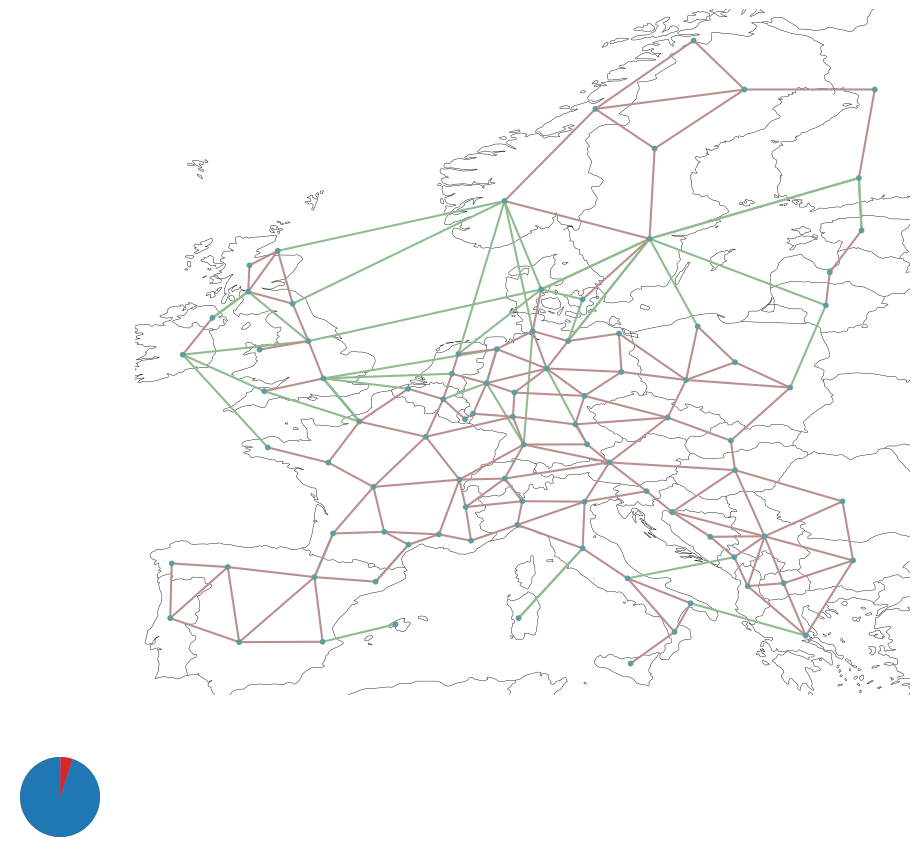

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pypsa

# Create a figure and axis with a geographic projection (e.g., PlateCarree)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the network using pypsa's `n.plot()` with the Cartopy projection
n.plot(ax=ax, geomap=True)

# Define the buses of interest
buses_of_interest = ["BE0 0", "BE0 1"]

# Loop through each bus and plot pie chart
for bus_name in buses_of_interest:
    # Get generators connected to the bus
    generators_at_bus = n.generators[n.generators["bus"] == bus_name]

    # Get the generation data for these generators (sum over time)
    generation = n.generators_t.p[generators_at_bus.index].sum(axis=0)

    # Aggregate by carrier
    generation_mix = generation.groupby(generators_at_bus["carrier"]).sum()

    # Get bus location (assuming the bus has 'x' and 'y' attributes for coordinates)
    x, y = n.buses.loc[bus_name, ["x", "y"]]
    print(y)

    # Plot pie chart at bus location
    pie_sizes = generation_mix.values
    pie_labels = generation_mix.index

    # Create pie chart on the same axes as the network plot
    ax_pie = plt.axes([0, 0, 0.1, 0.1])  # Define axes for pie chart (dummy position)
    #ax_pie.set_position([bus_location["x"], bus_location["y"], 0.05, 0.05])  # Adjust position
    ax_pie.pie(pie_sizes, center=(x, y), startangle=90, frame=False)

# Show the map with the pie charts
plt.show()


